<a href="https://colab.research.google.com/github/magomeda228/Colab_Google_ML_H-W/blob/main/y%3Dsin(x)_y%3D2%5Ex_sin(x%5E_x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install sympy

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(13.0,5.0)
import torch
import numpy as np

0.015195287764072418


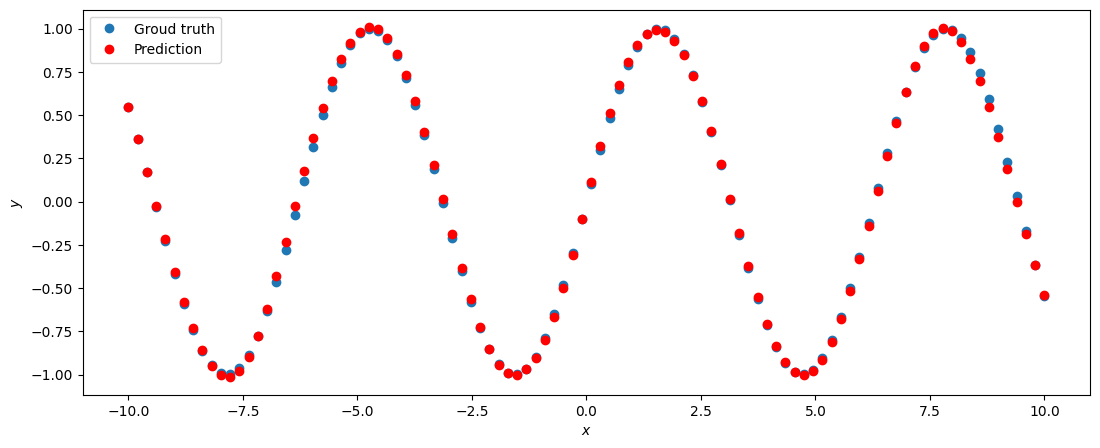

In [108]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
y_train = y_train + noise
x_train=x_train.unsqueeze_(1)
y_train=y_train.unsqueeze_(1)
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
x_validation=x_validation.unsqueeze_(1)
y_validation=y_validation.unsqueeze_(1)

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(60)
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
def metric(pred, target):
    return (pred - target).abs().mean()
predict(sine_net, x_validation, y_validation)
print(metric(sine_net.forward(x_validation), y_validation).item())

0.024626687169075012


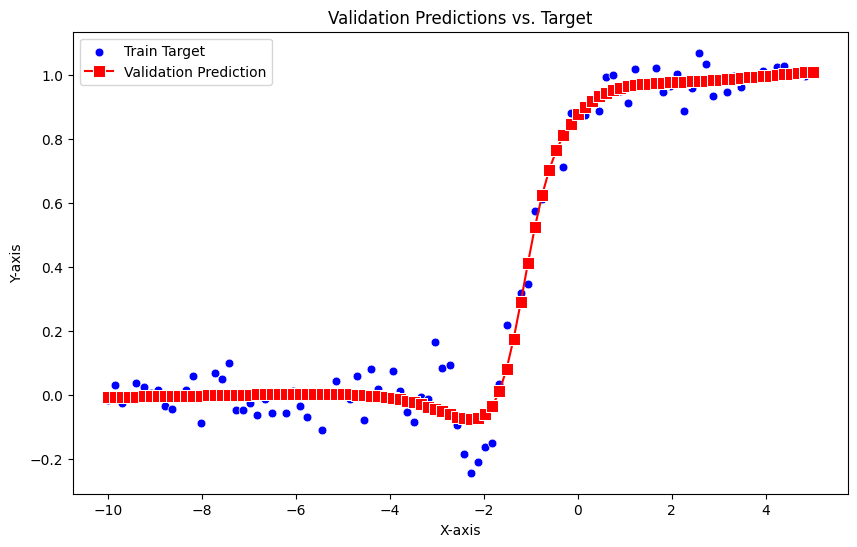

In [95]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
  def __init__(self,n_hidden_neurons):
    super(RegressionNet, self).__init__()
    self.fc1=torch.nn.Linear(1,n_hidden_neurons)
    self.act1=torch.nn.Sigmoid()
    self.fc2=torch.nn.Linear(n_hidden_neurons,1)
  def forward(self,x):
    x=self.fc1(x)
    x=self.act1(x)
    x=self.fc2(x)
    return x

net = RegressionNet(10)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train=x_train.unsqueeze_(1)
y_train=y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation=x_validation.unsqueeze_(1)
y_validation=y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
def loss(pred,target):
  return (pred-target).abs().mean()

for epoch_index in range(1000):
     optimizer.zero_grad()
     y_pred =net.forward(x_train)
     loss_value = loss(y_pred, y_train)
     loss_value.backward()
     optimizer.step()

def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
net.eval()
y_pred_train = net(x_train).detach()
y_pred_validation = net(x_validation).detach()

plt.figure(figsize=(10, 6))

# Plot training data and predictions
sns.scatterplot(x=x_train.squeeze().numpy(), y=y_train.squeeze().numpy(), label="Train Target", color="blue", s=40)


# Plot validation data and predictions
sns.lineplot(x=x_validation.squeeze().numpy(), y=y_pred_validation.squeeze().numpy(), label="Validation Prediction", color="red", marker="s", markersize=8)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Validation Predictions vs. Target")
plt.legend()
plt.show()